In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

In [ ]:
print(train_df.columns)

Index(['filename', 'pixel size(mm)', 'head circumference (mm)'], dtype='object')


In [ ]:
print(X_train.dtypes)

Series([], dtype: object)


In [ ]:
print(y_train.dtypes)

float64


In [ ]:
print(X_train.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
print(X_train.isnull().sum())

Series([], dtype: float64)


In [ ]:
print(X_train.shape, y_train.shape)

(999, 0) (999,)


In [ ]:
X_train = train_df[['pixel size(mm)', 'head circumference (mm)']]


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load the training and test data
train_df = pd.read_csv('/content/drive/MyDrive/Data/practice2/training_set_pixel_size_and_HC.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Data/practice2/test_set_pixel_size.csv')

# Inspect the structure of the training DataFrame
print(train_df.head())  # Check the first few rows
print(train_df.columns)  # Check column names

# Preprocess the images (not needed for random forest)
# Define your features and target variable
X_train = train_df.drop(columns=['filename', 'head circumference (mm)'])  # Drop 'filename' column
y_train = train_df['pixel size(mm)']

# Check the contents of X_train to ensure features are present
print(X_train.head())

# Define the model (Random Forest Regressor)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model
rf_model.fit(X_train, y_train)

# Prepare test data
X_test = test_df.drop(columns=['filename'])

# Predict on the test set
rf_pred = rf_model.predict(X_test)


     filename  pixel size(mm)  head circumference (mm)
0  000_HC.png        0.069136                    44.30
1  001_HC.png        0.089659                    56.81
2  002_HC.png        0.062033                    68.75
3  003_HC.png        0.091291                    69.00
4  004_HC.png        0.061240                    59.81
Index(['filename', 'pixel size(mm)', 'head circumference (mm)'], dtype='object')
   pixel size(mm)
0        0.069136
1        0.089659
2        0.062033
3        0.091291
4        0.061240


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/Data/practice2/training_set_pixel_size_and_HC.csv')

# Define features and target variable
X = train_df.drop(columns=['filename', 'head circumference (mm)'])  # Drop irrelevant columns
y = train_df['pixel size(mm)']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
train_preds = rf_model.predict(X_train)
val_preds = rf_model.predict(X_val)

train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)
val_mae = mean_absolute_error(y_val, val_preds)

print("Training MSE:", train_mse)
print("Training MAE:", train_mae)
print("Validation MSE:", val_mse)
print("Validation MAE:", val_mae)

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/Data/practice2/test_set_pixel_size.csv')

# Prepare the test data
X_test = test_df.drop(columns=['filename'])

# Predict on the test set
test_preds = rf_model.predict(X_test)

# Optionally, save the predictions to a CSV file
test_df['pixel size(mm)_predicted'] = test_preds
test_df.to_csv('/content/drive/MyDrive/Data/practice2/test_set_pixel_size_with_predictions.csv', index=False)


Training MSE: 1.1888433104172739e-07
Training MAE: 5.988672022007262e-05
Validation MSE: 1.165289937957883e-05
Validation MAE: 0.0003579804046050854


In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on the test set
pred = rf_model.predict(X_test)

# Get the true values
y_true = test_df['pixel size(mm)'].values

# Calculate MAE
mae = mean_absolute_error(y_true, pred)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.00034839596941663463


In [ ]:
import matplotlib.pyplot as plt

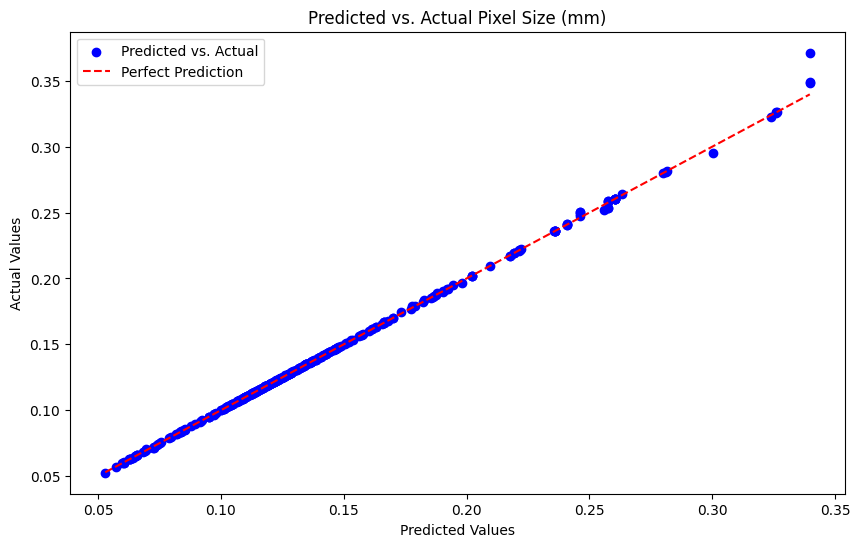

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(pred, y_true, color='blue', label='Predicted vs. Actual')
plt.plot([min(pred), max(pred)], [min(pred), max(pred)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Pixel Size (mm)')
plt.legend()
plt.show()
